<a href="https://colab.research.google.com/github/Pujitha52/Mini-Project/blob/main/ML_MINOR_MAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

watermelon_1200.jpg


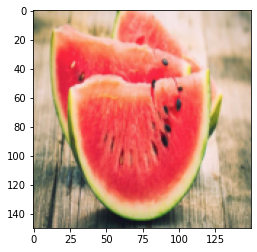

_156fbac0-7839-11e8-98f1-ed5cda4a01f0.jpg


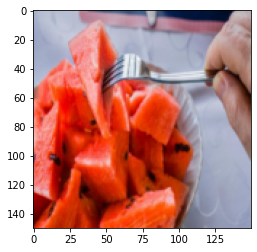

shutterstock_583745164-1.jpg


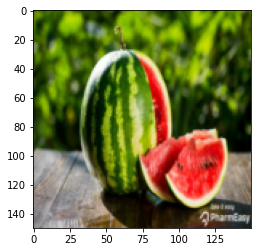

Health-Benefits-of-Watermelon.jpg


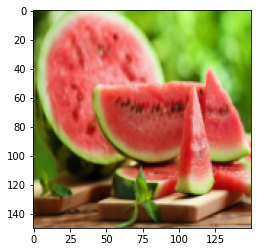

Watermelon-Big-Wedge-in-Hands-scaled.jpg


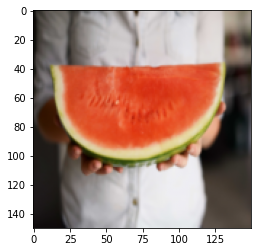

when-can-babies-eat-watermelon.jpg


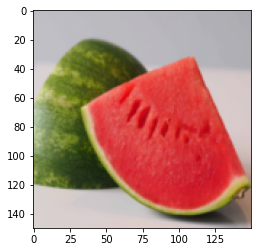

cutting-watermelon8.jpg


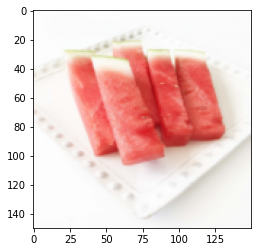

whole-and-slices-watermelon.jpg


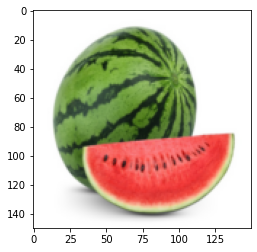

crimson-watermelon.jpg


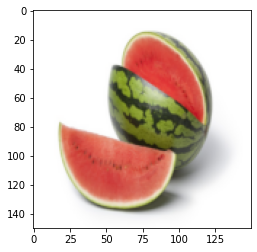

AdobeStock_166257354_edited.jpg


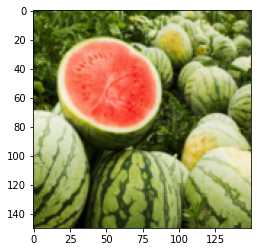

Watermelon-Mambo.jpg


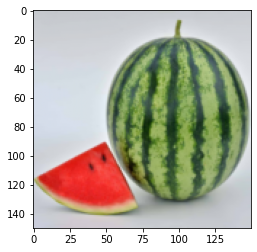

syngenta_seddless_watermelon_ct._syngenta.jpg


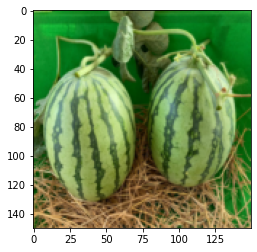

68374658.png


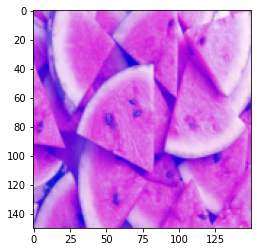

health-benefits-watermelon.jpg


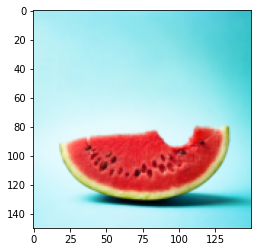

Watermelo_slice-e1594407047257-936x1024.jpg


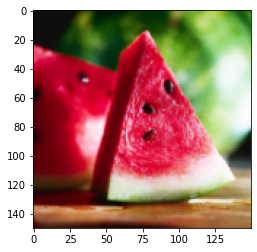

sliced-watermelon-chunks.jpg


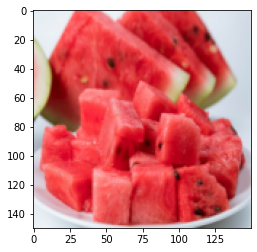

watermelon_16x9.jpg


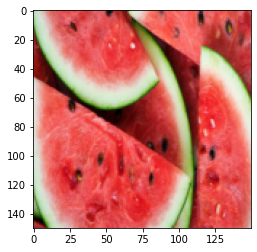

watermelon-side-effects-s.jpg


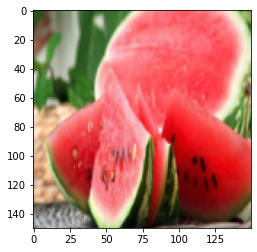

watermelon.jpg


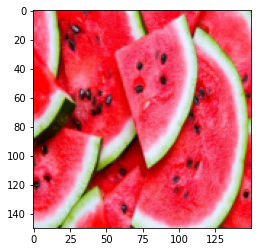

QCRt2ButzyC6FJi8pb6hNi.jpg


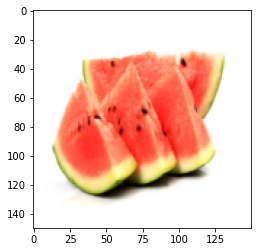

high-angle-view-of-watermelon-slices-on-table-royalty-free-image-769783321-1564779194.jpg


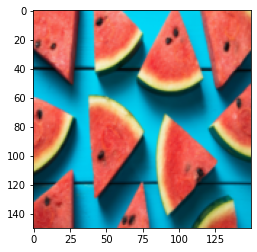

a-juicy-looking-watermelon.jpg


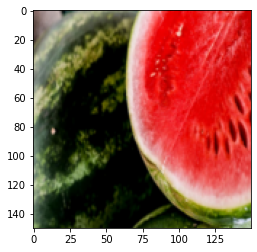

watermelon (1).jpg


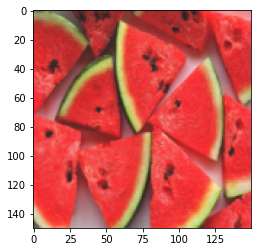

691.png


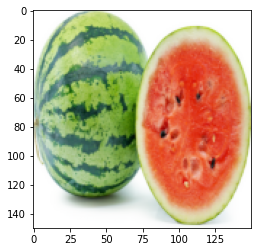

AdobeStock_279072592_edited.jpg


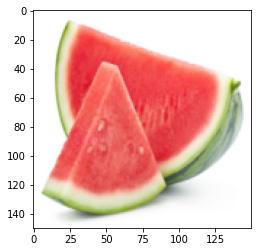

1140-six-things-about-watermelon-new-promo.imgcache.rev7cfcba07fb26c5f63ccb95ec58189429.web.900.518.jpg


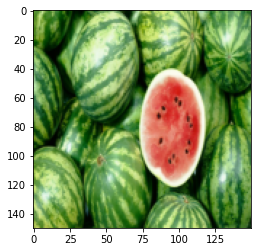

iStock_67194635_LARGE.jpg


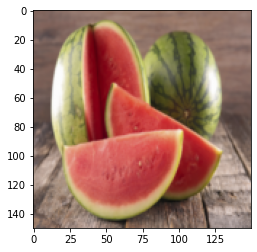

AdobeStock_174975391.jpeg


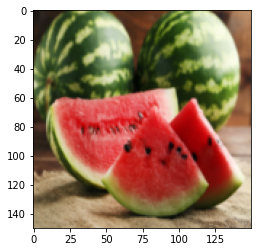

iStock-174959827-1200x900.jpg


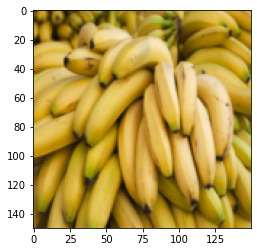

istock-183380744.jpg


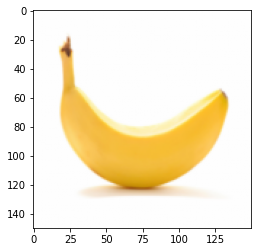

1280px-India_-_Koyambedu_Market_-_Banana_08_3986943802.jpg


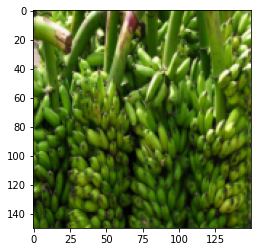

bananas-1354785_1920-1200x800.jpg


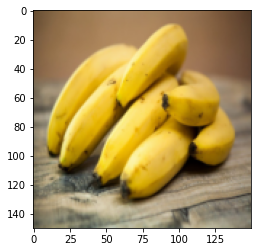

10329784.jpg


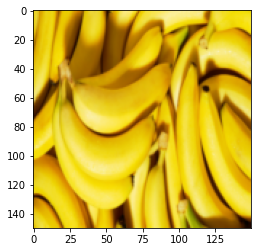

banana-feat-1.jpg


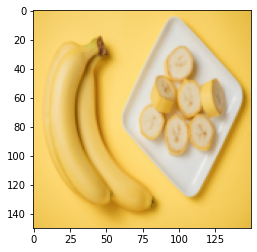

banana_1200-1.jpg


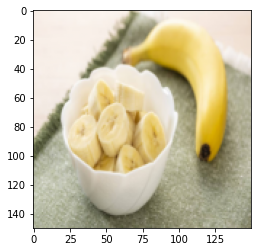

Bananas-218094b-scaled.jpg


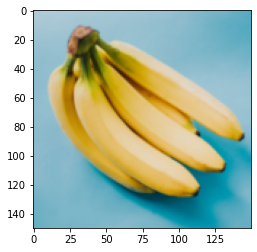

banana-day1-scaled.jpg


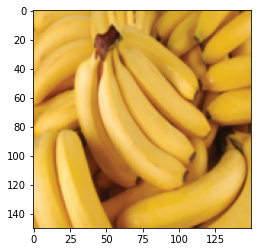

1800x1200_what_to_know_about_bananas_slideshow.jpg


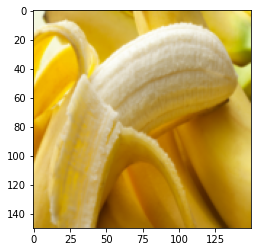

shutterstock_1670635690-scaled.jpg


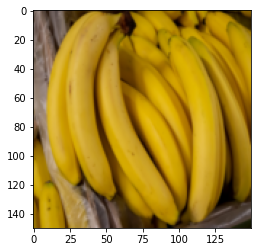

Green-bananas.jpg


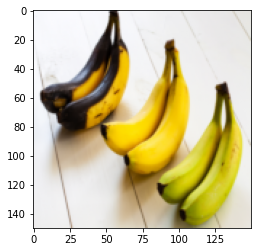

top-health-benefits-of-banana.jpg


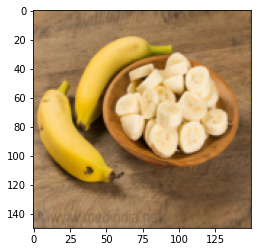

banana-photo-6-1-1024x890.jpg


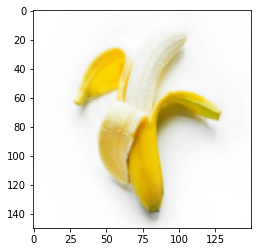

banana-peel.jpg


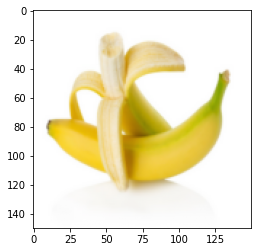

bananas-1296x728-feature.jpg


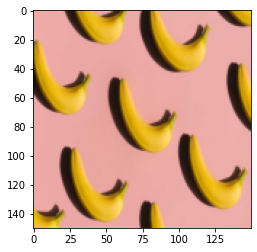

06-Nov-20-ogp.jpeg


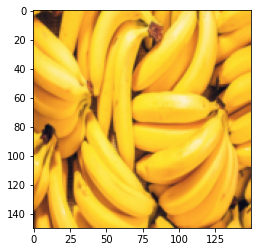

https___specials-images.forbesimg.com_imageserve_5d5301a868cb0a000916e828_0x0.jpg


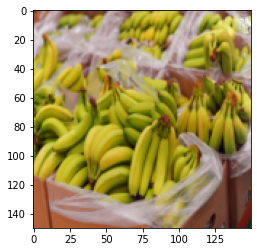

banana-1200.jpg


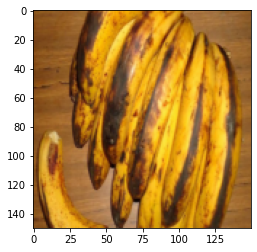

greenbanana_090719.jpg


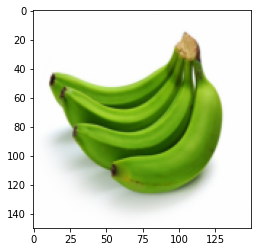

40179390_6-fresho-baby-banana-robusta.jpg


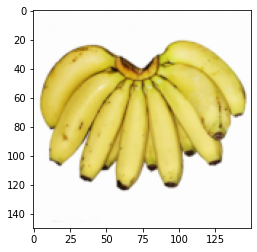

Banana_on_whitebackground.jpg


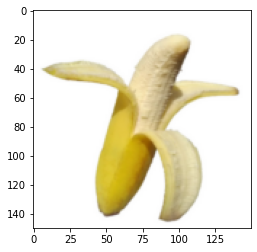

banana-slices-1.jpg


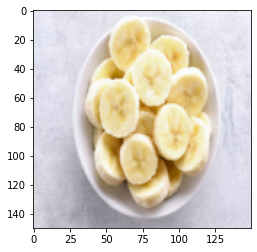

Banana_dágua.jpg


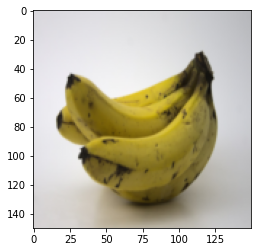

Cavendish_Banana_DS.jpg


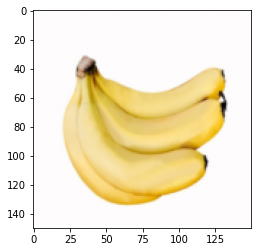

4b425ce723034ecc2455240d3d7da2e0_1600x.jpg


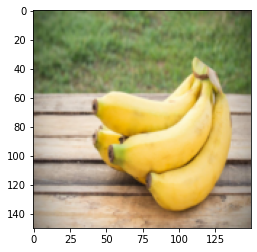

e6a028d6ac43ed2ae3dcf9806f7ff346.jpg


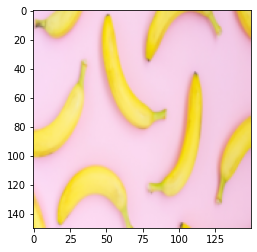

Banana-Single.jpg


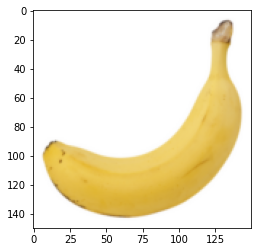

bananas-isolated.jpg


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


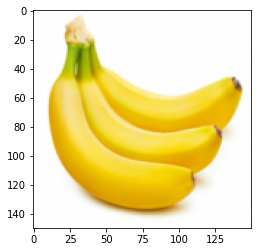

GettyImages-1217053689.jpg


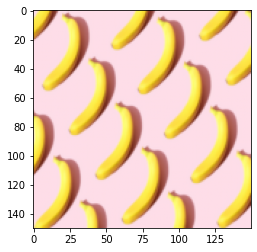

image-20161021-1763-13xoceb.jpg


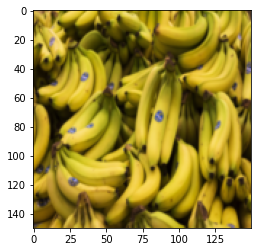

In [86]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

DATADIR = '/content/drive/MyDrive/Smartknower-Machine Learning/Minor_Project/Images'


categories = ['Watermelon','Banana']
types = []
flat_data = []
images=[]

for i in categories:
  path = os.path.join(DATADIR,i)
  for img in os.listdir(path):
    print(img)
    img_array = imread(os.path.join(path,img))

    img_resize = resize(img_array,(150,150,3))
    flat_data.append(np.ndarray.flatten(img_resize))
    types.append(i)
    images.append(img_resize)
    plt.imshow(img_resize)
    plt.show()

flat_data = np.array(flat_data)
types = np.array(types)
images=np.array(images)

In [87]:
flat_data

array([[0.47964052, 0.4924902 , 0.38606536, ..., 0.41330719, 0.43149673,
        0.34184314],
       [0.67368627, 0.71290196, 0.81094118, ..., 0.56862745, 0.61176471,
        0.72941176],
       [0.25111111, 0.34915033, 0.04718954, ..., 0.10588235, 0.1372549 ,
        0.15294118],
       ...,
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.99215686, 0.86666667, 0.90980392, ..., 0.99607843, 0.86666667,
        0.90980392],
       [0.74908078, 0.59921569, 0.30588235, ..., 0.71372549, 0.5254902 ,
        0.12156863]])

<BarContainer object of 2 artists>

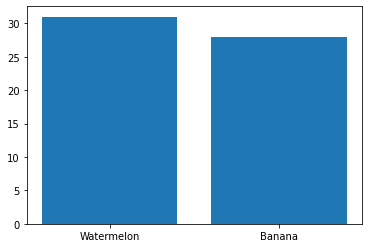

In [88]:
unique, count = np.unique(types,return_counts=True)
plt.bar(categories,count)

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,types,test_size=0.3,random_state=109)

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [91]:
y_pred= clf.predict(x_test)
y_pred

array(['Banana', 'Watermelon', 'Banana', 'Banana', 'Watermelon',
       'Watermelon', 'Banana', 'Watermelon', 'Watermelon', 'Banana',
       'Banana', 'Banana', 'Watermelon', 'Watermelon', 'Watermelon',
       'Watermelon', 'Watermelon', 'Banana'], dtype='<U10')

In [92]:
y_test

array(['Banana', 'Watermelon', 'Banana', 'Banana', 'Watermelon',
       'Watermelon', 'Banana', 'Watermelon', 'Watermelon', 'Banana',
       'Banana', 'Banana', 'Watermelon', 'Watermelon', 'Watermelon',
       'Watermelon', 'Watermelon', 'Banana'], dtype='<U10')

In [93]:
from sklearn.metrics import  accuracy_score,confusion_matrix

In [94]:
accuracy_score(y_pred,y_test)

1.0

In [95]:
confusion_matrix(y_pred,y_test)

array([[ 8,  0],
       [ 0, 10]])

8100

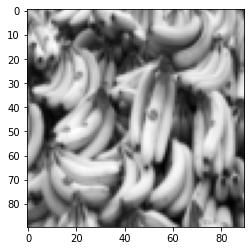

In [96]:
from skimage.color import rgb2gray

img_resize = resize(img_array,(90,90))
img_gray = rgb2gray(img_resize)
plt.imshow(img_gray,cmap='gray')
img_gray.size



In [97]:
df = pd.DataFrame(flat_data)
df['target'] = types
df

0         1         2  ...     67498     67499      target
0   0.479641  0.492490  0.386065  ...  0.431497  0.341843  Watermelon
1   0.673686  0.712902  0.810941  ...  0.611765  0.729412  Watermelon
2   0.251111  0.349150  0.047190  ...  0.137255  0.152941  Watermelon
3   0.100863  0.167529  0.007843  ...  0.675791  0.593438  Watermelon
4   0.055882  0.041176  0.028431  ...  0.278431  0.243137  Watermelon
5   0.745098  0.737255  0.768627  ...  0.672078  0.657186  Watermelon
6   0.992157  0.992157  0.992157  ...  0.972549  0.972549  Watermelon
7   1.000000  1.000000  1.000000  ...  1.000000  1.000000  Watermelon
8   1.000000  1.000000  1.000000  ...  1.000000  1.000000  Watermelon
9   0.101961  0.149020  0.031208  ...  0.480941  0.137490  Watermelon
10  0.772549  0.784314  0.803922  ...  0.803922  0.835294  Watermelon
11  0.696745  0.842209  0.486026  ...  0.655176  0.444052  Watermelon
12  0.796732  0.211275  0.848856  ...  0.416667  0.893137  Watermelon
13  0.658824  0.921569  0.952941  ...  0.870588  0.917647  Watermelon
14  0.060314  0.060314  0.060314  ...  0.395739  0.195739  Watermelon
15  0.898039  0.925490  0.945098  ...  0.813725  0.849020  Watermelon
16  0.702261  0.838301  0.706889  ...  0.761791  0.738993  Watermelon
17  0.191346  0.348209  0.152131  ...  0.411346  0.411616  Watermelon
18  0.981046  0.286980  0.373908  ...  0.221098  0.277908  Watermelon
19  1.000000  1.000000  1.000000  ...  1.000000  1.000000  Watermelon
20  0.964706  0.482834  0.382614  ...  0.690196  0.847059  Watermelon
21  0.513359  0.415033  0.399346  ...  0.772444  0.631556  Watermelon
22  0.482647  0.510373  0.295529  ...  0.242588  0.273961  Watermelon
23  1.000000  1.000000  1.000000  ...  1.000000  1.000000  Watermelon
24  1.000000  1.000000  1.000000  ...  1.000000  1.000000  Watermelon
25  0.423895  0.626301  0.227373  ...  0.154719  0.031817  Watermelon
26  0.486275  0.388235  0.356863  ...  0.411765  0.407020  Watermelon
27  0.105882  0.078431  0.070588  ...  0.592157  0.490196  Watermelon
28  0.356863  0.275490  0.060784  ...  0.711765  0.336275      Banana
29  0.996078  0.996078  0.996078  ...  0.996078  0.996078      Banana
30  0.135784  0.123529  0.105392  ...  0.211765  0.011765      Banana
31  0.400000  0.298039  0.192157  ...  0.414052  0.337255      Banana
32  0.925490  0.827157  0.114379  ...  0.027451  0.000000      Banana
33  0.941176  0.788235  0.364706  ...  0.729412  0.250980      Banana
34  0.976471  0.933333  0.909804  ...  0.486484  0.360118      Banana
35  0.694118  0.802915  0.849974  ...  0.682353  0.768627      Banana
36  0.890196  0.831345  0.780364  ...  0.717647  0.254902      Banana
37  0.956863  0.972549  0.882353  ...  0.509804  0.000000      Banana
38  0.407974  0.341416  0.306144  ...  0.066667  0.000000      Banana
39  0.972549  0.976471  0.992157  ...  0.901961  0.878431      Banana
40  0.713072  0.564052  0.407190  ...  0.380392  0.260784      Banana
41  0.992157  0.992157  0.992157  ...  1.000000  1.000000      Banana
42  1.000000  1.000000  1.000000  ...  1.000000  1.000000      Banana
43  0.933333  0.666667  0.654902  ...  0.674510  0.654902      Banana
44  0.992157  0.722876  0.160784  ...  0.540850  0.150980      Banana
45  0.317288  0.193118  0.208804  ...  0.193797  0.123209      Banana
46  0.511222  0.308719  0.113183  ...  0.362203  0.149020      Banana
47  0.996078  0.996078  0.996078  ...  0.996078  0.996078      Banana
48  0.992157  0.992157  0.992157  ...  0.992157  0.992157      Banana
49  1.000000  1.000000  1.000000  ...  1.000000  1.000000      Banana
50  0.916804  0.912882  0.967784  ...  0.815980  0.870882      Banana
51  0.847059  0.843137  0.862745  ...  0.760784  0.768627      Banana
52  0.996078  0.988235  0.988235  ...  0.988235  0.988235      Banana
53  0.301961  0.376471  0.250980  ...  0.423725  0.388431      Banana
54  0.968627  0.839216  0.952941  ...  0.711765  0.817320      Banana
55  1.000000  1.000000  1.000000  ...  1.000000  1.000000      Banana
56  0.996078  0.99607